In [1]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import svm
from sklearn import datasets
from matplotlib.colors import ListedColormap

%matplotlib inline

config = dict()
config['resource_dir'] = "../resources/"
config['raw_file'] = config['resource_dir'] + "iris.data.csv"

iris_df = pd.read_csv(config['raw_file'],header=None)
iris_df.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
print iris_df

     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0        

In [2]:
"""X_train = iris_df.iloc[0:100,0:4]
y_train = iris_df.iloc[0:100,4]

X_test = iris_df.iloc[100:150,0:4]
y_test = iris_df.iloc[100:150,4]

X_test"""

X = iris_df.iloc[:,0:2]
y = iris_df.iloc[:,4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
X_train

,sepal_length,sepal_width
72,6.3,2.5
46,5.1,3.8
66,5.6,3.0
2,4.7,3.2
126,6.2,2.8
67,5.8,2.7
125,7.2,3.2
52,6.9,3.1
62,6.0,2.2
112,6.8,3.0


In [3]:
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

AttributeError: 'str' object has no attribute 'view'

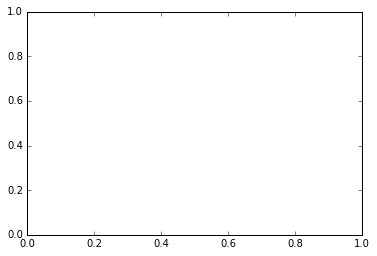

In [4]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X.iloc[:, 0].min() - .1, X.iloc[:, 0].max() + .1
    y_min, y_max = X.iloc[:, 1].min() - .1, X.iloc[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

plot_estimator(svc, X_test, y_test)